# Aula 3 - Estatística Descritiva e Probabilidade

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Probabilidade
    - 2.1) Testes de normalidade
- 3) Estatística Descritiva


___
___
___

## 1) Introdução

Hoje iniciaremos nossa introdução a **Probabilidade e Estatística**.

Essas duas áreas são extremamente amplas, e fornecem toda a base da ciência de dados. Por isso, vamos dar uma olhada nos principais conceitos!

A probabilidade e estatística podem ser dividias nos seguintes três pilares:

**Probabilidade**: é a teoria matemática utilizada para se estudar a incerteza oriundas de `fenômenos`de caráter aleátorio.

**Estatística Descritiva**: Etapa inicial da análise estatística, tendo como objetivo tirar informações prévias de modo informal e direto. A ideia é obter informações que `resumam` o conjuto de dados, a fim que estes possam ser `descritos`, e conclusões iniciais possam ser tiradas.

    - Já usamos várias dessas técnicas (sem saber explicitamente) no processo de EDA (exploratory data analysis)!

**Inferência estatística**: É o conjunto de técnicas que possibilitam a extrapolação de conclusões tiradas a partir de um conjunto pequeno de dados (denominado `amostra`) para todo o universo sob análise (denominado (`população`).

<img src="https://phhp-faculty-cantrell.sites.medinfo.ufl.edu/files/2012/07/mod10-big_picture_inference.gif" width="600">

Vamos começar com os códigos!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

___
___
___

## 2) Probabilidade

Probabilidade é a área da matemática que estuda **eventos aleatórios**, cujos resultados são **probabilísticos** ou **estocásticos**.

Existem poucos sistemas na natureza que são de fato inerentemente aleatórias e não-determinísticas. No entanto, uma descrição determinística pode ser muito complicada, de modo que **se torna conveniente** tratar o sistema como um sistema estocástico.

Ex.: lanaçamento de moeda, lançamento de dados, etc.

O objetivo da estatística é similar: analisar dados ou criar modelos que **generalizem relações** que não podem ser determinadas diretamente uma vez que não temos acesso à população. Neste sentido, há muita probabilidade envolvida em estatística, e é por isso que vamos olhar para os principais conceitos de probabilidade.

_____

### 2.1) Variável aleatória

Uma **variável aleatória** é uma variável cujo valor depende de fatores **não-deterministícos**, isto é, **probabilísticos**. 

**Exemplo**: resultado do lançamento de um dado.

_____

### 2.2) Definição de probabilidade

Definimos uma função $P(.)$ denominada **probabilidade** que deve satisfazer as seguintes propriedades:
    
- $0\leq P(A) \leq 1$ 

- $ P(\omega)=1$

- $ P(\cup A_{j})= \sum_{j=1}^{n}P(A_{j})$

_____

### 2.3) Distribuições de probabilidade

Uma **distribuição de probabilidade** é uma função que descreve o comportamento aleatório de um fenômeno dependente do acaso.

A distribuição de probabilidade pode **modelar incertezas** e descrever fenômenos físicos, biológicos, econômicos, entre outros.

Para representar a distribuição matematicamente, frequentemente utilizamos a [função densidade de probabilidade](https://en.wikipedia.org/wiki/Probability_density_function). Esta função é tal que a probabilidade da variável aleatória cair em uma faixa particular é dada **pela integral da densidade dessa variável sobre tal faixa** - isto é, é dada pela área abaixo da função densidade mas acima do eixo horizontal e entre o menor e o maior valor dessa faixa.

<img src="https://work.thaslwanter.at/Stats/html/_images/PDF.png" width=400>

Há muitas distribuições de probabilidade diferentes.

Entre as distribuições de probabilidade, a **distribuição normal** tem uma importância particular. De acordo com o **teorema central do limite**, a distribuição normal captura o **comportamento assintótico** de várias outras distribuições de probabilidade.

____

**2.3.1) Distribuição Normal**

É representada por uma **curva simétrica em torno do seu ponto médio**, apresentando assim seu famoso formato de **sino** (bell shape).  

A curva de distribuição normal representa o comportamento de **diversos processos e fenômenos comuns**, como por exemplo: altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova, etc.

A distribuição normal serve também como base para a **inferência estatística** clássica, sendo a premissa em diversos modelos e métodos.

Na distribuição normal, a média, mediana e moda dos dados possuem o mesmo valor. 

<img src="https://dietassessmentprimer.cancer.gov/images/learn/distribution1.jpg">

Usaremos a notação X ~ N($\mu$,$\sigma^2$) para representar uma variável aleatória **com distribuição normal** de média $\mu$ e variância $\sigma^2$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1280px-Normal_Distribution_PDF.svg.png" width=500>

A equação da distribuição normal é:

<img src="https://www.onlinemathlearning.com/image-files/normal-distribution-formula.png" width=200>



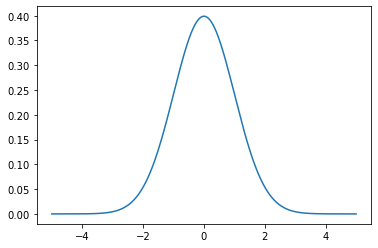

In [2]:
x = np.linspace(-5, 5, 400)

mu = 0 
sigma = 1
# definição explícita da curva
y = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x - mu)**2/2*sigma**2)

plt.plot(x, y)

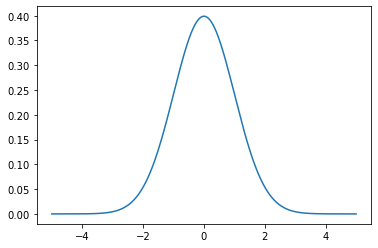

In [3]:
import scipy

x = np.linspace(-5, 5, 400)

mu = 0 
sigma = 1
# usando o scipy
y = scipy.stats.norm(loc=mu, scale=sigma).pdf(x)

plt.plot(x, y)

Na distribuição normal, os dados são distribuídos de forma muito particular, tal que o **desvio padrão** determina a proporção de dados em cada faixa:

<img src="https://miro.medium.com/max/24000/1*IdGgdrY_n_9_YfkaCh-dag.png" width=500>

<img src="https://miro.medium.com/max/24000/1*IZ2II2HYKeoMrdLU5jW6Dw.png" width=500>

___________

### 2.1) Testes de Normalidade

Vamos agora ver alguns **teste estatísticos** que são utilizados para determinar se uma amostra segue uma distribuição normal ou não.

Antes de aplicarmos os testes, devemos saber como interpretá-los. 

Os testes que faremos vão retornar dois resultados:

- **Estatística de teste**: uma quantidade numérica calculada pelo teste utilizando os dados da amostra;
- **p-value**: um valor de probabilidade que é utilizado para interpretar o resultado do teste.

O teste irá **assumir que a amostra analisada foi construída a partir de uma distribuição normal**. 

Essa é a **HIPÓTESE NULA ($H_0$) do teste**.

O que o p-value nos dá é **a probabilidade de termos encontrado o valor da estatística de teste assumindo a hipótese nula**.

Ou seja, se a amostra de fato for normal, qual é a probabilidade de termos encontrado o valor da estatística de teste?

Se essa probabilidade for **muito baixa**, quer dizer que **seria extremamente improvável que encontrássemos aquele valor pra estatística de teste se de fato a amostra fosse normal**, e, portanto, dizemos que os dados **nos dão evidência suficiente para rejeitar a hipótese nula: ou seja, a amostra NÃO é normal.**

Se, por outro lado, o p-value for alto, isso quer dizer que **falhamos em rejeitar a hipótese nula** -- não podemos dizer que a a amostra *não* é normal. Isso não quer dizer que a hipótese nula é verdadeira -- mas não temos evidências a favor de sua rejeição.

Em geral, o p-value ser "pequeno" ou "grande" se dá em termos de um **npivel de confiança**, denotado $\alpha$, que normalmente é tomado como  $\alpha = 5\%$. 

Assim, a forma simples de interpretar os resultados do teste, é:

- $ p \leq \alpha \ ( p \leq 0.05) \ $: rejeitamos a $H_0$: distribuição amostral não é normal;

- $ p > \alpha \ ( p > 0.05) \ $: falhamos em rejeitar a $H_0$: distribuição amostral normal;


Se você quiser saber mais sobre testes de normalidade, [clique aqui!](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/), ou [aqui](https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411)

E se quiser saber mais sobre p-values, sugiro [este vídeo](https://youtu.be/vemZtEM63GY) e [este](https://youtu.be/JQc3yx0-Q9E) pra ter uma ideia como p-values são calculados!

Vamos agora conhecer alguns testes! 

Para isso, utilizaremos [o módulo stats da biblioteca scipy](https://docs.scipy.org/doc/scipy/reference/stats.html)

Antes, vamos criar duas amostras, uma claramente normal, e outra não:

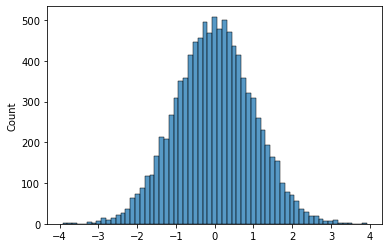

In [4]:
np.random.seed(42)
normal = np.random.normal(0, 1, 10000)

sns.histplot(normal)

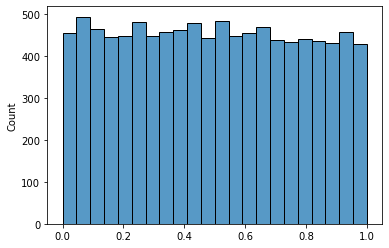

In [5]:
np.random.seed(42)
uniforme = np.random.rand(10000)

sns.histplot(uniforme)

__D’Agostino’s K^2 Test__

O teste K^2 de D’Agostino’s é baseado nas estatísticas descritivas **kurtosis** e **skewness**:

- **Skewness** é uma medida de **assimetria** da distribuição, isto é, o quanto ela é deslocada para a esquerda ou direita.
    - **A distribuição normal tem skewness igual a 0**

- **Kurtosis** quantifica a porção dos dados na **cauda** da distribuição -- ou seja, valores mais extremos.
    - **A distribuição normal tem kurtosis igual a 3**

<img src="https://i.pinimg.com/originals/0f/c7/66/0fc7666e8c1ab2822ad7a8e4fb534b88.gif" width=500>

Para detalhes como o teste funciona, [clique aqui](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test)

A função `normaltest()` do scipy aplica o teste a determinado conjunto de dados. A função retorna ambos a estatística de teste e o respectivo p-value.

In [6]:
# importa o teste
from scipy.stats import normaltest
    
# fazendo o teste
test_stat, p = normaltest(normal)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

# interpretação do teste
# nível de confiança de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

Estatística de teste: 0.33214260688733543

p-value: 0.8469858390291732

Falha em rejeitar H_0: amostra parece ser normal


______

__Shapiro-Wilk Test__

O teste de Shapiro-Wilk é um dos testes de normalidade mais comuns e confiáveis, embora haja algumas sugestões de que o teste funcione melhor para amostras pequenas (algumas milhares de observações ou menos).

Para detalhes como o teste funciona, [clique aqui](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)

A função `shapiro()` do scipy aplica o teste a determinado conjunto de dados. A função retorna ambos a estatística de teste (W) e o respectivo p-value.

In [7]:
# importa o teste
from scipy.stats import shapiro

# fazendo o teste
test_stat, p = shapiro(uniforme)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

# interpretação do teste
# nível de confiança de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

Estatística de teste: 0.9556165337562561

p-value: 0.0

Rejeição da H_0: amostra não é normal


C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


____
____
____

## 3) Estatística Descritiva

Como mencionamos, o principal objetivo da estatística descritiva é gerar **medidas que resumam** o conjunto de dados que estamos analisando, ou seja, medidas que descrevam **a distribuição** dos dados, de forma quantitativa. Vamos dar uma olhada nessas medidas!

_______

### 3.1) Medidas de Posição

Estas são medidas que **resumem** algumas propriedades do conjunto de dados:

<img src="https://i.pinimg.com/originals/3e/8a/90/3e8a90c122ad25240cc46ac075cb0f4c.png" width=200>

#### 3.1.1) Média

Seja $X$ uma variável quantitativa e $x_1,x_2,x_3, ...$ os valores assumidos por X. Define-se média de $\overline{X}$ como sendo :


$$\overline{X} = \frac{\sum_{i=1}^{n}x_i}{n}= \frac{x_1+ x_2 + x_3 +... +x_n}{n}$$

In [8]:
np.random.seed(42)
amostra = np.random.randint(1, 20, 12)

print("Dados:", amostra)

print("\nMédia dos dados:", amostra.mean())

# podemos usar tb: np.mean(amostra) 
# ou ainda: sum(amostra)/len(amostra)

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Média dos dados: 8.833333333333334


#### 3.1.1) Mediana

A **mediana** de uma variável é um número tal que há o mesmo número de observações maiores e menores do que ele, ocupando assim a **posição central** da série de observações.

Assim, para calcularmos a mediana, basta **ordenarmos os dados, do menor pro maior**, e contar o que está no meio dos dados ordenados (se houver número par de dados, pega-se a média entre os dados que estão "no meio")

- *Exemplo*

i) 3,4,**7**,8,8 **mediana=7**       (CASO ÍMPAR)

ii) 3,4,**7**,**8**,8,9 **mediana=(7+8)/2=7,5**   (CASO PAR)

Logo, podemos definir 

- - Mediana de $X = X_{\frac{n+1}{2}}$ `Se tamanho da amostra ímpar`


- - Mediana de $X = \frac{X_{\frac{n}{2}}+ X_{\frac{n+1}{2}}}{2}$ `Se tamanho da amostra par`

Como os valores de **indice no python** começam em `0`, devemos nos atentar que a equação acima deve ficar como:

- - Mediana de $X = X_{\frac{n}{2}}$ `Se tamanho da amostra par`


- - Mediana de $X = \frac{X_{\frac{n-1}{2}}+ X_{\frac{n}{2}}}{2}$ `Se tamanho da amostra ímpar`

In [9]:
print("Dados:", amostra)

print("\nDados ordenados:", sorted(amostra))

print("\nMediana dos dados:", np.median(amostra))

# nesse caso, não tem o método .median(), tem que fazer da maneira acima!

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Dados ordenados: [2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 15, 19]

Mediana dos dados: 8.0


#### 3.1.3) Quartis

Quartis (Q1, Q2 e Q3): São valores dados a partir do conjunto de observações ordenado em ordem crescente, que dividem os dados **em quatro partes iguais**. 

- O primeiro quartil, Q1, é o número que deixa 25% das observações abaixo e 75% acima;
- O segundo quartil, Q2 é a **mediana**, deixa 50% das observações abaixo e 50% das observações acima;
- O terceiro quartil, Q3, deixa 75% das observações abaixo e 25% acima;


<img src="https://aprendendogestao.com.br/wp-content/uploads/2016/07/QE-Figura-1.png" width="700" height="700" />

In [10]:
print("Dados:", amostra)

print("\nDados Ordenados:", sorted(amostra))

print("\nQ1:", np.quantile(amostra, 0.25))
print("\nQ2:", np.quantile(amostra, 0.50))
print("\nQ3:", np.quantile(amostra, 0.75))

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Dados Ordenados: [2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 15, 19]

Q1: 6.25

Q2: 8.0

Q3: 11.0


####  3.1.4) Intervalo Interquartílico (IQR - interquantile range)

Por construção, aproximadamente metade dos dados estão entre o 1º e o 3º quartil, isto é, este também pode ser interpretado como **um intervalo de valores tipicamente assumidos pelas observações**, e também é uma **medida de dispersão**, pois nos dá uma ideia da variação que existe entre o Q1 e o Q3!


In [11]:
print("Dados:", amostra)

iqr = np.quantile(amostra, 0.75) - np.quantile(amostra, 0.25)

print("\nIQR:", iqr)

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

IQR: 4.75


#### 3.1.5) Moda

A **moda** é o valor que ocorre com **maior frequencia** em um conjunto de dados 

Dependendo do conjunto de dados, ele pode ser:

- Sem moda: quando nenhum valor se repete 

- unimodal: Quando existe apenas um valor repetido com maior frequência 

- multimodal: quando existem mais de um valor com a mesma frequência máxima




In [12]:
print("Dados:", amostra)

# não existe método np.mode(), temos que transformar os dados em uma série
print("\nModa dos dados:", pd.Series(amostra).mode()[0])

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Moda dos dados: 11


In [17]:
pd.Series(amostra).mode()

0    11
dtype: int32

____

### 3.2) Medidas de Dispersão

Estas são **medidas de variabilidade**, que indicam o quanto as observações variam ao redor de alguma medida de centralidade (média, mediana, etc.). 

Em outras palavras, indicam **o quão longe podemos esperar que uma observação esteja do valor típico para aquela variável**. 

Existem diversas medidas de variabilidade, algumas das quais apresentamos a seguir.

#### 3.2.1) Amplitude

A amplitude é a **diferença entre o maior e o menor valor observado**. 

- **Fortemente influenciada** por valores extremos nas observações, como outliers. 

In [18]:
print("Dados:", amostra)
print("\nDados ordenados:", sorted(amostra))

print("\nAmplitude:", amostra.max()-amostra.min())

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Dados ordenados: [2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 15, 19]

Amplitude: 17


####  3.2.2) Variância 

A variância representa **o quanto os dados se afastam da média, em geral**. Por definição, tomamos a média dos **desvios quadráticos da média**:

$$ Var(X) = \sum_{i=1}^{n}\frac{(x-\overline{x})^{2}}{n}$$

In [19]:
print("Dados:", amostra)

print("\nVariância:", np.var(amostra))

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Variância: 22.305555555555557


####  3.2.3) Desvio padrão (std) - standard deviation

Note que, da forma como foi definida, a variância é um valor **quadrático** nos dados. Para evitar isso, é comum tirar a raiz quadrada da variância, o que define o **desvio padrão**:

$$ \sigma(X) \equiv \sqrt{Var(X)} = \sqrt{\sum_{i=1}^{n}\frac{(x-\overline{x})^{2}}{n}}$$

In [20]:
print("Dados:", amostra)

print("\nDesvio Padrão:", np.std(amostra))

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Desvio Padrão: 4.722875771768251


#### 3.2.4) Assimetria - skewness

É o **grau de desvio ou afastamento** da **simetria** de uma distribuição.

Quando a curva é simétrica, a `média`, a `mediana` e a `moda` coincidem, num mesmo ponto, havendo um perfeito equilíbrio na distribuição. Um exemplo de distribuição simétrica é a **distribuição normal**.

Quando o equilíbrio não acontece, a média, a mediana e a moda recaem em pontos diferentes da distribuição, e a distribuição se torna **assimétrica**:

<img src="https://www.researchgate.net/profile/Marco_Faria/publication/294890337/figure/fig5/AS:668873900716049@1536483373457/a-Negative-skewness-b-Normal-curve-c-Positive-skewness-Durkhure-and-Lodwal-2014.ppm" width=600>


- Distribuição assimétrica **Negativa ou enviesada a esquerda**: quando os valores se concentram na extremidade superior da escala e se distribuem gradativamente em direção à extremidade inferior.

- Distribuição assimétrica **Positiva ou enviesada a direita**: quando os valores se concentram na extremidade inferior da escala e se distribuem gradativamente em direção à extremidade superior.

A medidade de assimetria é conhecida como **skewness**, sendo calculada como:

$$ s(X) = \frac{1}{\sigma^3}\sum_{i=1}^{n}\frac{(x-\overline{x})^{3}}{n}$$

O valor da skewness nos indica a assimetria da distribuição:

- s = 0: distribuição simétrica
- s > 0: assimetria à direira
- s < 0: assimetria à esquerda

In [21]:
print("Dados:", amostra)

print("\nSkewness:", pd.Series(amostra).skew())

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Skewness: 0.6106376977108375


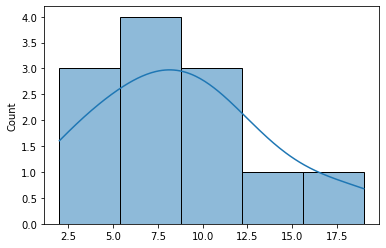

In [22]:
sns.histplot(amostra, kde=True)

___


Opção: usar as funções estatísticas da biblioteca [scipy!](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)

Para uma lista das funções estatísticas disponíveis, [clique aqui!](https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics)

___

### 3.3) Tabelas de Frequência

A distribuição de frequências é um agrupamento de dados em classes, de tal forma que contabilizamos o número de ocorrências em cada classe.

O objetivo é apresentar os dados de uma maneira mais concisa e que nos permita extrair informação sobre seu comportamento. A seguir, apresentamos algumas definições necessárias à construção da distribuição de frequências.

**Frequência absoluta (ƒi):** É o número de observações correspondente a cada classe. A frequência absoluta é, geralmente, chamada apenas de frequência.

**Frequência relativa (ƒri):** É o quociente entre a frequência absoluta da classe correspondente e a soma das frequências (total observado), isto é, $ \displaystyle f_{ri}=\frac{f_i}{\sum_{j}f_j} $ onde n representa o número total de observações.

**Frequência percentual (pi):** É obtida multiplicando a frequência relativa por 100%.

In [24]:
# como exemplo, vamos usar a base do titanic

df = pd.read_csv("../datasets/titanic.csv")

In [25]:
print("Tabela de frequência ABSOLUTA da coluna 'Survived':")

display(df["Survived"].value_counts())

Tabela de frequência ABSOLUTA da coluna 'Survived':


0    549
1    342
Name: Survived, dtype: int64

In [26]:
print("Tabela de frequência RELATIVA da coluna 'Survived':")

display(df["Survived"].value_counts(normalize=True))

Tabela de frequência RELATIVA da coluna 'Survived':


0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [27]:
print("Tabela de frequência PERCENTUAL da coluna 'Survived':")

display(df["Survived"].value_counts(normalize=True)*100)

# se quiser colocar as porcentagens, tem que transformar em string, e concatenar com o "%"
df["Survived"].value_counts(normalize=True).apply(lambda x: str(round(x*100, 2)) + "%")

Tabela de frequência PERCENTUAL da coluna 'Survived':


0    61.616162
1    38.383838
Name: Survived, dtype: float64

0    61.62%
1    38.38%
Name: Survived, dtype: object

Vamos analisar os dados de idade...

In [28]:
print("Média de idades:", df["Age"].mean())
print("Desvio padrão de idades:", df["Age"].std())

print("\nIdade mínima:", df["Age"].min())

print("\nIdade Q1:", df["Age"].quantile(0.25))
print("Mediana de idades:", df["Age"].median())
print("Idade Q3:", df["Age"].quantile(0.75))
print("IQR das idades:", df["Age"].quantile(0.75) - df["Age"].quantile(0.25))

print("\nIdade máxima:", df["Age"].max())

print("\nSkewness das idades:", df["Age"].skew())

print("\nIdade(s) mais comum(s):")
display(df["Age"].mode())

Média de idades: 29.69911764705882
Desvio padrão de idades: 14.526497332334044

Idade mínima: 0.42

Idade Q1: 20.125
Mediana de idades: 28.0
Idade Q3: 38.0
IQR das idades: 17.875

Idade máxima: 80.0

Skewness das idades: 0.38910778230082704

Idade(s) mais comum(s):


0    24.0
dtype: float64

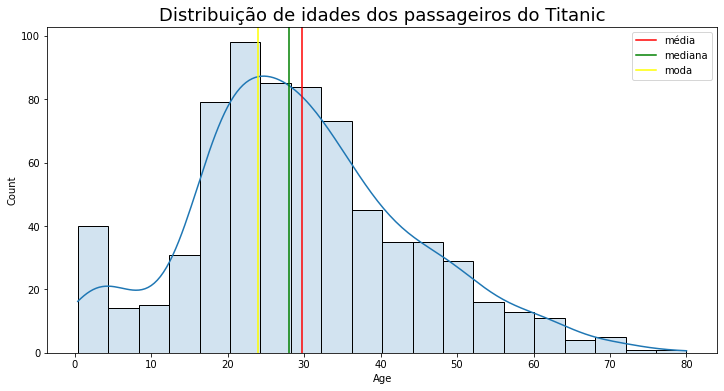

In [29]:
plt.figure(figsize=(12, 6))

plt.title("Distribuição de idades dos passageiros do Titanic", size=18)

sns.histplot(df["Age"], kde=True, alpha=0.2)

# plotando média
plt.axvline(x=df["Age"].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df["Age"].median(), color="green", label="mediana")

# plotando a(s) moda(s)
for i in range(df["Age"].mode().shape[0]):
    
    plt.axvline(df["Age"].mode()[i], color="yellow", label="moda")

plt.legend()
plt.show()

____

### 3.4) Boxplot

O boxplot (gráfico de caixa) é um gráfico utilizado para avaliar a distribuição empírica do dados. O boxplot é formado pelo primeiro e terceiro quartil e pela mediana. As hastes **whiskers** inferiores e superiores se estendem, respectivamente, do quartil inferior até o menor valor não inferior ao limite inferior e do quartil superior até o maior valor não superior ao limite superior. Os limites são calculados da forma abaixo

Limite inferior: $ \max\{\min(\text{dados});Q_1-1,5(Q_3-Q_1)\} $.

Limite superior: $ \min\{\max(\text{dados});Q_3+1,5(Q_3-Q_1)\} $.

Para este caso, os pontos fora destes limites são considerados valores discrepantes (outliers) e são denotados por asterisco (*). A Figura  a seguir apresenta um exemplo do formato de um boxplot.

<img src=https://miro.medium.com/max/8000/1*0MPDTLn8KoLApoFvI0P2vQ.png width=500>

O boxplot pode ainda ser utilizado para uma comparação visual entre dois ou mais grupos. Por exemplo, duas ou mais caixas são colocadas lado a lado e se compara a variabilidade entre elas, a mediana e assim por diante. Outro ponto importante é a diferença entre os quartis $ (Q_3 - Q_1) $ que é uma medida da variabilidade dos dados.

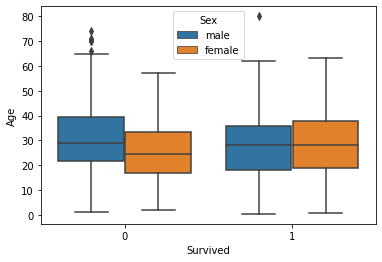

In [30]:
sns.boxplot(data=df, y="Age", x="Survived", hue="Sex")

In [31]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

df.groupby(["Survived", "Sex"])[["Age"]].agg(["mean", q1, "median", q3])

Age                     
                      mean     q1 median     q3
Survived Sex                                   
0        female  25.046875  16.75   24.5  33.25
         male    31.618056  21.75   29.0  39.25
1        female  28.847716  19.00   28.0  38.00
         male    27.276022  18.00   28.0  36.00

______


### 3.5) Correlação

Um dos conceitos mais importantes em Data Science é o da **correlação**.

A partir de estudos de correlação, é possível **descobrirmos como diferentes variáveis interagem**, e isso forma a base da construção de **portfolios diversificados**!

<img src="https://www.mathsisfun.com/data/images/correlation-examples.svg" width=700>

É bem importante distinguirmos correlações **lineares** de **não lineares**. 

<img src="https://miro.medium.com/max/1414/1*ZMwog-_YcD0qBHc9_1T1-w.png" width=700>

Para fazer a distinção acima, há testes específicos!

Para ilustrar as noções de correlação, vamos utilizar uma base de dados de alturas e pesos:

In [32]:
df_wh = pd.read_csv('../datasets/weight-height.csv')

In [33]:
df_wh

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [34]:
# passando altura de polegadas pra centimetros
df_wh["Height"] = df_wh["Height"] * 2.54

# passando peso de libras pra quilos
df_wh["Weight"] = df_wh["Weight"] / 2.2046

df_wh

,Gender,Height,Weight
0,Male,187.571423,109.722200
1,Male,174.706036,73.623547
2,Male,188.239668,96.498619
3,Male,182.196685,99.810610
4,Male,177.499761,93.599656
...,...,...,...
9995,Female,168.078536,62.041846
9996,Female,170.350573,77.505174
9997,Female,162.224700,58.276022
9998,Female,175.346978,74.322989


Será que há alguma correlação entre peso e altura?

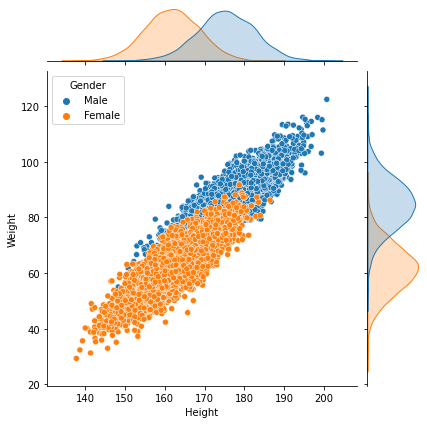

In [35]:
sns.jointplot(data=df_wh, x="Height", y="Weight", hue="Gender")

Aperentemente há uma relação **linear** entre as variáveis! 

A seguir, veremos como quantificar a correlação observada acima!

____

### 3.5.1) Coeficiente de correlação de Pearson

Este coeficiente expressa a **taxa de relação linear entre duas variáveis numéricas**. Quanto mais próximo de 1 ou -1, mais **linearmente correlacionado estão as variáveis testadas**

**Suposições:**
 - as observações são idependentes uma das outras e identicamente distribuidas.
 - as observações têm distribuição normal;
 
**Interpretações:**
 - $H_0$: as amostras são linearmente independentes, isso é, não estão correlacionadas linearmente;
 - $H_1$: as amostras estão linearmente correlacionadas.


Vamos dar uma olhada no teste de Pearson:

In [37]:
import scipy

scipy.stats.pearsonr(df_wh["Weight"], df_wh["Height"])

(0.9247562987409147, 0.0)

Separadamente para os sexos:

In [38]:
scipy.stats.pearsonr(df_wh[df_wh["Gender"] == "Male"]["Weight"], df_wh[df_wh["Gender"] == "Male"]["Height"])

(0.8629788486163177, 0.0)

In [40]:
scipy.stats.pearsonr(df_wh[df_wh["Gender"] == "Female"]["Weight"], df_wh[df_wh["Gender"] == "Female"]["Height"])

(0.8496085914186009, 0.0)

Em ambos os casos (e para todos os dados), obtivemos um coeficiente de pearson bem próxima de 1!

E o p-valor foi 0, isso é: rejeitamos $H_0$, o que implica que as duas amostras **estão correlacionadas linearmente**!

___________

### 5.2) Coeficiente de correlação de Spearman

Este coeficiente indica se as amostras possuem correlação *monotônica*, isso é, **se aumentarmos ou diminuimos uma, a outra irá aumentar ou diminuir**. 

O coeficiente varia entre -1 e 1:

> Quanto mais próximo de 1 for o coeficiente, mais positivamente correlacionada as amostras, isso é, se aumentarmos uma, a outra ira aumentar (ou se diminuimos uma, a outra irá diminuir); 

> Quanto mais próximo de -1 for o resultado, mais negativamente correlacionada estão as variáveis, isso é, aumentando uma, a outra irá dimunuir (ou se diminuímos uma, a outra irá aumentar). 

> Uma correlação de 0 indica ausência de correlação.

**Importante:** o coeficiente de Spearman **não** indica correlação necessariamente linear!

**Suposições:** 
 - as observações são idependentes uma das outras e identicamente distribuidas.

 
 **Interpretação:**
 - $H_0$: as variáveis são independentes; ou
 - $H_1$ as variáveis são monotonicamente dependentes.

Ao analisarmos os valores da base de altura e peso, é natural que tenhamos um coeficiente de Spearman próximo de 1, dado que percebemos claramente uma relação monotônica entre as variáveis:

In [41]:
scipy.stats.spearmanr(df_wh[df_wh["Gender"] == "Female"]["Weight"], df_wh[df_wh["Gender"] == "Female"]["Height"])

SpearmanrResult(correlation=0.8364885471875417, pvalue=0.0)

In [42]:
scipy.stats.spearmanr(df_wh[df_wh["Gender"] == "Male"]["Weight"], df_wh[df_wh["Gender"] == "Male"]["Height"])

SpearmanrResult(correlation=0.8485589833503592, pvalue=0.0)

___
___
___